Ejercicio 23.A
De la primera red neuronal de las flores que hemos usado en el tema 1, muestra una gráfica en la que se muestre:

- Eje X: Nº de época
- Eje Y: Valor de la función de pérdida. Recuerda que los datos están en history.history['loss']
- Personaliza el gráfico de la forma siguiente:
  - El tamaño de la figura será de (7 y 5)
  - Eje X:
    - El label será "Nº Épocas", con color "#003B80" y tamaño de fuente 13
    - Los números que parecerán serán siempre números enteros y no con decimales
  - Eje Y:
    - El label será "Métricas" con color "#003B80" y tamaño de fuente 13
    - Se verá del 0 al 1.1
    - Los números a salir los números del eje Y serán 0.1, 0.2, etc
- El título del subplot será "Red:" y el número de neuronas de cada capa.
- El color del fondo es #F0F7FF
- Que se vea el grid de los ejes de color blanco con ancho de las líneas de 2 píxeles.
- Para que la línea salga punteada para ello usa linestyle="dotted" en el método plot
- El número que se muestra en la leyenda es "loss entrenamiento:" y el valor en loss la última época con 2 decimales

In [43]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
import time
import numpy as np
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator

In [44]:
def compile_fit(layers_epochs, model_x, model_y):
    tf.keras.utils.set_random_seed(5)

    layers = layers_epochs[0]
    epochs = layers_epochs[1]

    model = Sequential()

    number_of_columns = len(model_x[0])

    for idx, layer in enumerate(layers):
        if idx == 0:
            model.add(Dense(layer, activation='relu', input_dim=number_of_columns))
        elif idx == (len(layers) - 1):
            model.add(Dense(layer, activation='sigmoid'))
        else:
            model.add(Dense(layer, activation='relu'))

    model.compile(loss='mean_squared_error')

    timestamp_before = time.time_ns()
    model_history = model.fit(model_x, model_y, epochs=epochs, verbose=False)
    timestamp_after = time.time_ns()

    return {
        "model": model,
        "elapsed_time": (timestamp_after - timestamp_before) / 1_000_000_000,
        "history": model_history
    }

In [45]:
def get_datos():
    iris = load_iris()

    sepal_length = iris.data[0:99, 0]
    petal_length = iris.data[0:99, 2]
    flower_type = iris.target[0:99]

    x = np.column_stack((sepal_length, petal_length))
    y = flower_type

    return x, y

In [46]:
def print_graph(x_data, x_label, y_data, y_label, axes, title):
    axes.set_facecolor("#F0F7FF")
    axes.grid(visible=True, which='major', axis='both', color="#FFFFFF", linewidth=2)
    axes.set_axisbelow(True)

    plot_drawn = axes.plot(x_data, y_data, linestyle="dotted")

    axes.set_xlabel(x_label, fontsize=13, labelpad=5, color="#003B80")
    axes.set_ylabel(y_label, fontsize=13, labelpad=5, color="#003B80")

    # Set x and y limits
    axes.set_xlim([0, len(x_data)])
    axes.set_ylim([0, 1.1])

    axes.margins(x=0.05, y=0.05)

    # Set x and y ticks
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    axes.yaxis.set_major_locator(MultipleLocator(0.1))

    axes.legend([f"training loss: {round(y_data[-1], 2)}"])
    axes.set_title(title)

In [47]:
neuronal_nets = [
    [[4, 8, 4, 2, 1], 40],
    [[8, 16, 8, 4, 1], 40],
    [[16, 32, 16, 8, 1], 40],
    [[32, 64, 32, 8, 1], 40],
    [[64, 128, 64, 8, 1], 40],
]

In [48]:
my_x, my_y = get_datos()

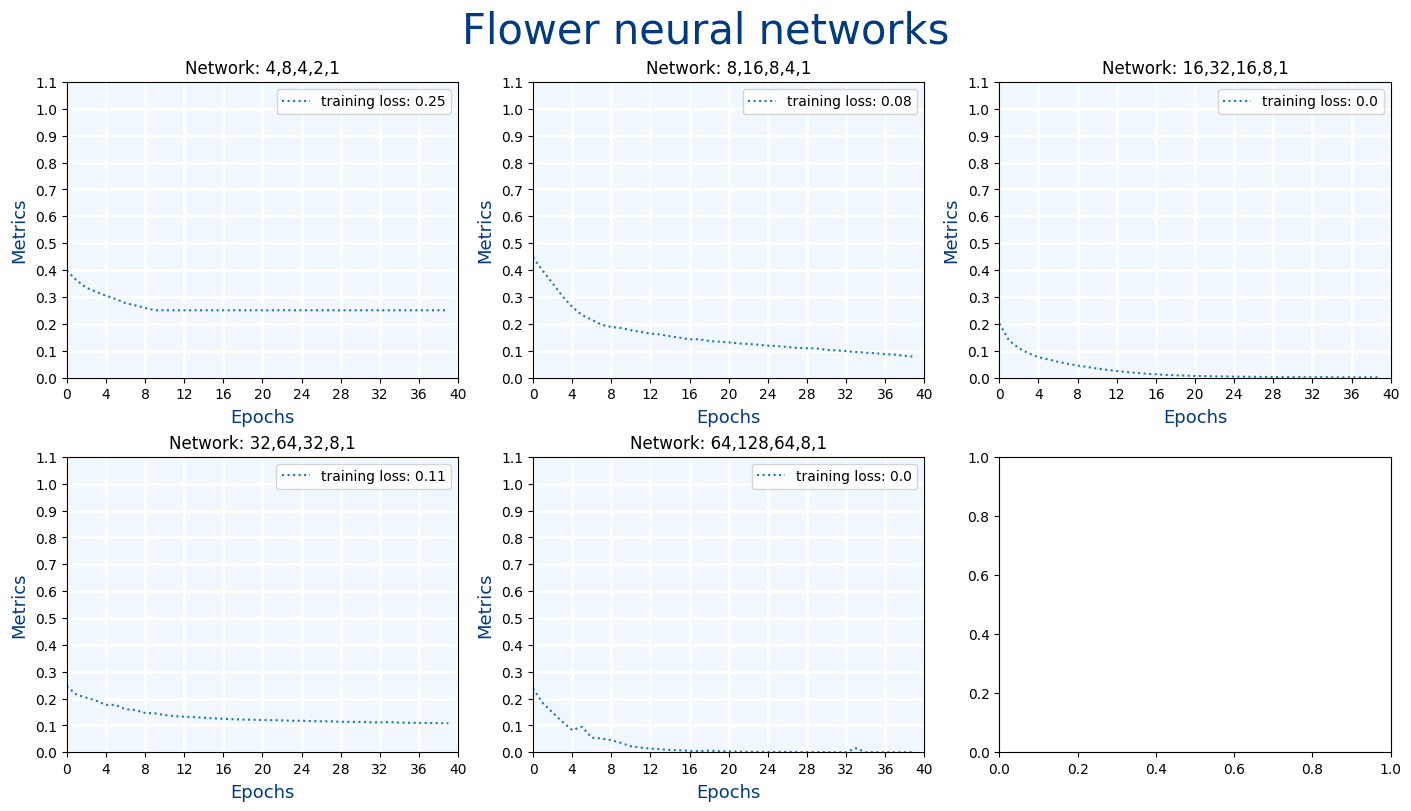

In [49]:
figure, arr_axes = plt.subplots(
    ncols=3,
    nrows=2,
    figsize=(14, 8),
    layout="constrained"
)
figure.suptitle("Flower neural networks", fontsize=30, color="#003B80")

for idx, net in enumerate(neuronal_nets):
    result = compile_fit(net, my_x, my_y)
    history = result["history"]
    print_graph(
        range(len(history.history['loss'])), 'Epochs',
        history.history['loss'], 'Metrics',
        arr_axes[idx // 3][idx % 3],
        "Network: " + ','.join(map(str, net[0]))
    )

plt.show()